In [ ]:
#A feldolgozott, mergelt inference excelekből itt csináltam ábrákat

In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os.path
import openpyxl
import os

In [2]:
CIRRUS=[1,24]
SPECTRALIS=[25,48]
TOPCON=[49,70]

In [3]:
egy_reteg=pd.read_excel('inference_1_reteg.xlsx')
ket_reteg=pd.read_excel('inference_2_reteg.xlsx')
lr_csokkentett=pd.read_excel('inference_lr_csokkentett.xlsx')

In [10]:
#egy_reteg.mean(numeric_only=True)
#ket_reteg.mean(numeric_only=True)
#lr_csokkentett.mean(numeric_only=True)

In [15]:
#Dice backgrounddal számolva
egy_reteg['Dice'] = egy_reteg.apply(lambda row: (row.Background + row.IRF + row.SRF + row.PED)/4, axis=1)
ket_reteg['Dice'] = ket_reteg.apply(lambda row: (row.Background + row.IRF + row.SRF + row.PED)/4, axis=1)
lr_csokkentett = lr_csokkentett.apply(lambda row: (row.Background + row.IRF + row.SRF + row.PED)/4, axis=1)

In [4]:
#Dice backgrounddal nélkül számolva
egy_reteg['Dice'] = egy_reteg.apply(lambda row: (row.IRF + row.SRF + row.PED)/3, axis=1)
ket_reteg['Dice'] = ket_reteg.apply(lambda row: (row.IRF + row.SRF + row.PED)/3, axis=1)
lr_csokkentett = lr_csokkentett.apply(lambda row: (row.IRF + row.SRF + row.PED)/3, axis=1)

In [5]:
def get_five_epochs(df):
    five_epochs=df[df['epoch']==5]
    return five_epochs
def get_ten_epochs(df):
    five_epochs=df[df['epoch']==10]
    return five_epochs

In [19]:
#atlagok=get_five_epochs(egy_reteg).groupby('learning_rate')['Dice'].mean()
atlagok=get_ten_epochs(ket_reteg).groupby('learning_rate')['Dice'].mean()
print(atlagok)

learning_rate
0.00001    0.290336
0.00010    0.280741
0.00100    0.224701
0.01000    0.001972
Name: Dice, dtype: float64


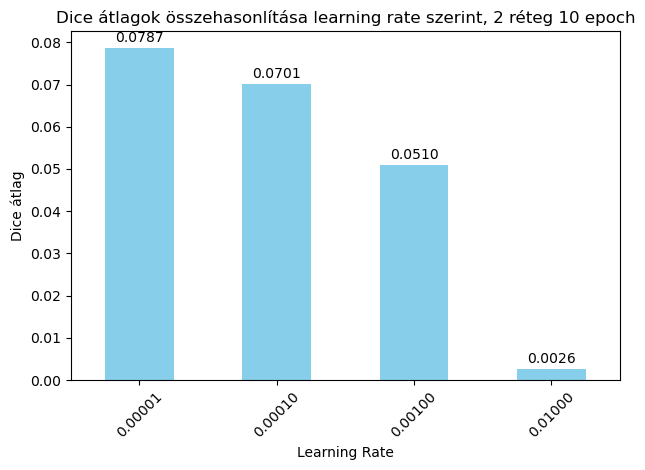

In [9]:
# Alakítsuk át a float indexeket stringgé egy egységes formában
atlagok=get_five_epochs(ket_reteg).groupby('learning_rate')['Dice'].mean()
atlagok.index = [f"{lr:.5f}" for lr in atlagok.index]
ax = atlagok.plot(kind='bar', color='skyblue')

plt.title('Dice átlagok összehasonlítása learning rate szerint, 2 réteg 10 epoch')
plt.ylabel('Dice átlag')
plt.xlabel('Learning Rate')
plt.xticks(rotation=45)
plt.tight_layout()

# Értékek kiírása az oszlopokra
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', label_type='edge', padding=2, fontsize=10)

#plt.savefig('ket_reteg_10_epoch.png', bbox_inches='tight')
plt.show()

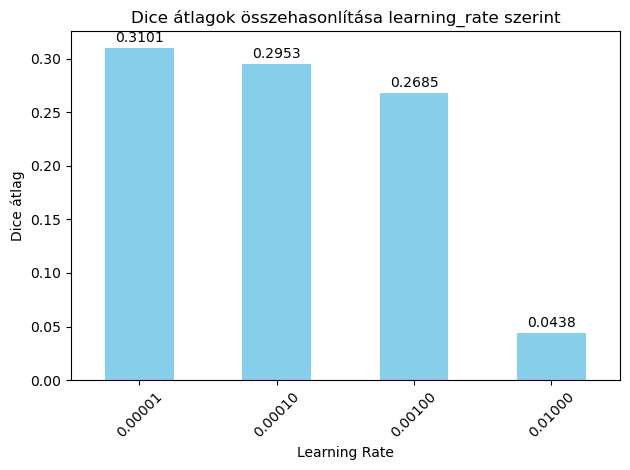

In [57]:
# Alakítsuk át a float indexeket stringgé egy egységes formában
atlagok.index = [f"{lr:.5f}" for lr in atlagok.index]
ax = atlagok.plot(kind='bar', color='skyblue')

plt.title('Dice átlagok összehasonlítása learning_rate szerint')
plt.ylabel('Dice átlag')
plt.xlabel('Learning Rate')
plt.xticks(rotation=45)
plt.tight_layout()

# Értékek kiírása az oszlopokra
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', label_type='edge', padding=2, fontsize=10)

plt.show()

In [110]:
atlagok = get_five_epochs(egy_reteg).groupby('learning_rate')[['IRF', 'SRF', 'PED']].mean()
print(atlagok)

                    IRF       SRF       PED
learning_rate                              
0.00001        0.059807  0.090010  0.099070
0.00010        0.044719  0.099903  0.079434
0.00100        0.040800  0.080637  0.053461
0.01000        0.008760  0.000000  0.000000


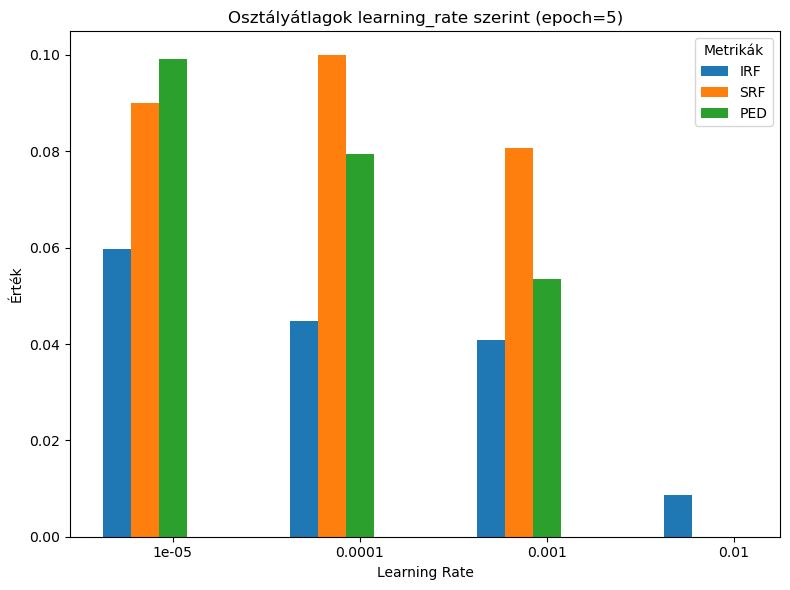

In [111]:
import matplotlib.pyplot as plt
# Alap plot DataFrame
atlagok_plot = atlagok.copy()

# Alakítsuk az indexet oszloppá, ha még nem az
atlagok_plot = atlagok_plot.reset_index()

# Beállítások a csoportosított oszlopdiagramhoz
x = atlagok_plot['learning_rate'].astype(str)  # x tengely kategóriák (string kell)
metrics = ['IRF', 'SRF', 'PED']
width = 0.15  # oszlopok szélessége
positions = range(len(x))

# Alap plot
fig, ax = plt.subplots(figsize=(8, 6))

# Több metrika egymás mellé
for i, metric in enumerate(metrics):
    offset = (i - 2) * width  # középre igazítás miatt
    ax.bar([p + offset for p in positions], atlagok_plot[metric], width=width, label=metric)

# Tengelycímkék, beállítások
ax.set_xticks(positions)
ax.set_xticklabels(x)
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Érték')
ax.set_title('Osztályátlagok learning_rate szerint (epoch=5)')
ax.legend(title='Metrikák')
plt.tight_layout()
plt.show()


In [102]:
atlag1 = get_five_epochs(egy_reteg).groupby('learning_rate')['Dice'].mean()
atlag2 = get_five_epochs(ket_reteg).groupby('learning_rate')['Dice'].mean()

osszehasonlitas = pd.DataFrame({
    'Egy réteg': atlag1,
    'Két réteg': atlag2
})

In [103]:
osszehasonlitas

,Egy réteg,Két réteg
learning_rate,,
0.00001,0.292325,0.287839
0.00010,0.278810,0.273164
0.00100,0.253543,0.243613
0.01000,0.002192,0.001972


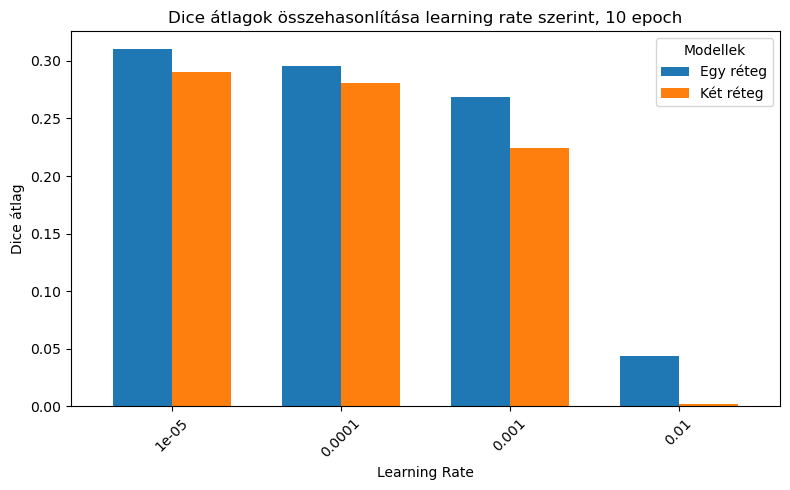

In [108]:
atlag1 = get_ten_epochs(egy_reteg).groupby('learning_rate')['Dice'].mean()
atlag2 = get_ten_epochs(ket_reteg).groupby('learning_rate')['Dice'].mean()

osszehasonlitas = pd.DataFrame({
    'Egy réteg': atlag1,
    'Két réteg': atlag2
})
ax = osszehasonlitas.plot(kind='bar', figsize=(8, 5), width=0.7)

plt.title('Dice átlagok összehasonlítása learning rate szerint, 10 epoch')
plt.ylabel('Dice átlag')
plt.xlabel('Learning Rate')
plt.xticks(rotation=45)
plt.legend(title='Modellek')
plt.tight_layout()
plt.savefig('retegek_10_epoch.png', bbox_inches='tight')
plt.show()


In [89]:
from tensorboard.backend.event_processing import event_accumulator
import pandas as pd
import os

# Az eseményfájl betöltése
def dataframe_function(path,epoch,learning_rate,cross_val):
    ea = event_accumulator.EventAccumulator(path)
    ea.Reload()
    
    # Példa: scalars (pl. 'loss', 'accuracy') beolvasása
    tags = ea.Tags()['scalars']
    dataframes = {}
    dfs = []
    
    for tag in tags:
        events = ea.Scalars(tag)
        df = pd.DataFrame(events)
        df['tag'] = tag
        df['epoch'] = epoch
        df['learning_rate'] = learning_rate
        df['cross_val'] = cross_val
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    return combined_df


In [91]:
path='/media/varga-denes/E/modell_100_epoch/runs/'
epochs=[100]
learning_rates=['1e-5']
cross_vals=[0,1,2,3,4]

all_dfs = []
for epoch in epochs:
    for learning_rate in learning_rates:
        for cross_val in cross_vals:
            foldername=path+str(epoch)+'_'+str(learning_rate)+'_'+str(cross_val)
            df = dataframe_function(foldername,epoch,learning_rate,cross_val)
            if not df.empty:
                all_dfs.append(df)
final_df = pd.concat(all_dfs, ignore_index=True)
print(final_df.head())

      wall_time  step     value         tag  epoch learning_rate  cross_val
0  1.747052e+09     0  1.163933  Loss/train    100          1e-5          0
1  1.747052e+09     1  0.939425  Loss/train    100          1e-5          0
2  1.747053e+09     2  0.880501  Loss/train    100          1e-5          0
3  1.747053e+09     3  0.850053  Loss/train    100          1e-5          0
4  1.747053e+09     4  0.834682  Loss/train    100          1e-5          0


In [92]:
final_df.to_excel('epoch_100_training.xlsx')

In [171]:
egy_reteg=pd.read_excel('1_reteg_futasok.xlsx')
ket_reteg=pd.read_excel('2_reteg_futasok.xlsx')

In [147]:
ot_epoch=ot_epoch[ot_epoch['tag']=='Accuracy/train']

In [149]:
ot_epoch=ot_epoch[['step','value','learning_rate','cross_val']]

In [150]:
ot_epoch

,step,value,learning_rate,cross_val
5,0,0.288629,0.01000,0
6,1,0.516971,0.01000,0
7,2,0.502768,0.01000,0
8,3,0.479111,0.01000,0
9,4,0.544946,0.01000,0
...,...,...,...,...
195,0,0.238920,0.00001,4
196,1,0.266602,0.00001,4
197,2,0.273585,0.00001,4
198,3,0.277502,0.00001,4


In [153]:
grouped = (
    ot_epoch.groupby(['step', 'learning_rate'])['value']
      .mean()
      .reset_index()
)


,step,learning_rate,value
0,0,0.00001,0.238795
1,0,0.00010,0.258757
2,0,0.00100,0.240382
3,0,0.01000,0.374126
4,1,0.00001,0.265969
5,1,0.00010,0.277184
6,1,0.00100,0.244277
7,1,0.01000,0.439778
8,2,0.00001,0.275687
9,2,0.00010,0.304748


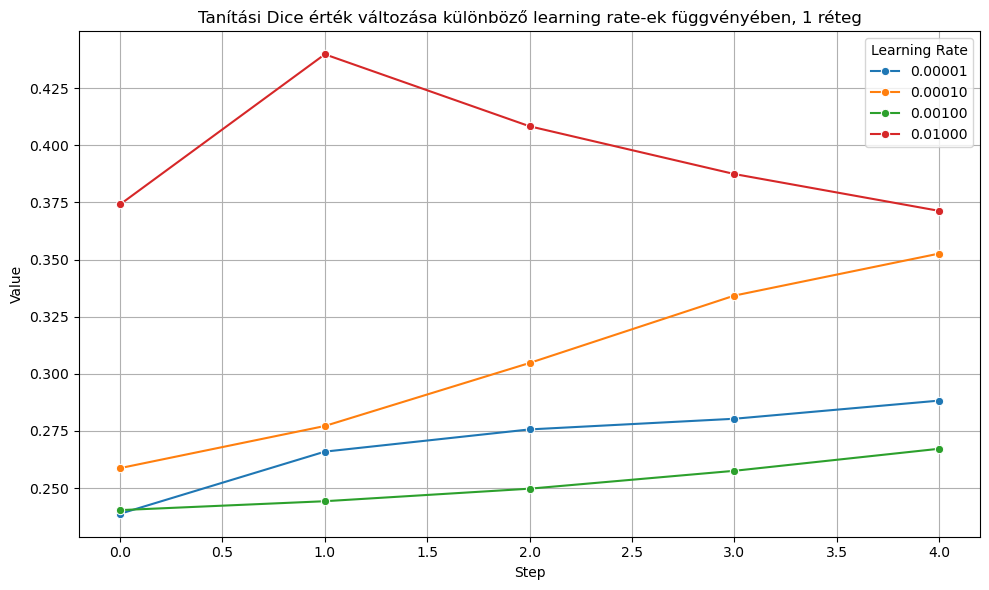

In [179]:
ot_epoch=egy_reteg[egy_reteg['epoch']==5]
ot_epoch=ot_epoch[ot_epoch['tag']=='Accuracy/train']
ot_epoch=ot_epoch[['step','value','learning_rate','cross_val']]
grouped = (
    ot_epoch.groupby(['step', 'learning_rate'])['value']
      .mean()
      .reset_index()
)
grouped['learning_rate'] = grouped['learning_rate'].map(lambda x: f"{x:.5f}")
grouped['learning_rate'] = grouped['learning_rate'].astype(str)
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='step', y='value', hue='learning_rate', marker='o',errorbar=None)

plt.title("Tanítási Dice érték változása különböző learning rate-ek függvényében, 1 réteg")
plt.xlabel("Step")
plt.ylabel("Value")
plt.legend(title="Learning Rate")
plt.grid(True)
plt.tight_layout()
plt.savefig('training_1_reteg_5_epoch.png', bbox_inches='tight')
plt.show()


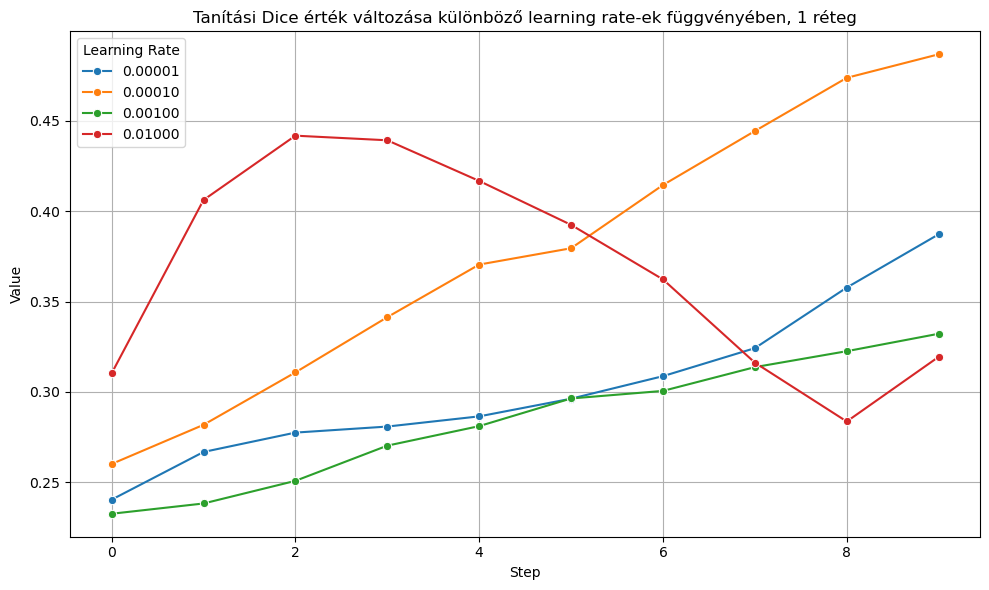

In [180]:
ot_epoch=egy_reteg[egy_reteg['epoch']==10]
ot_epoch=ot_epoch[ot_epoch['tag']=='Accuracy/train']
ot_epoch=ot_epoch[['step','value','learning_rate','cross_val']]
grouped = (
    ot_epoch.groupby(['step', 'learning_rate'])['value']
      .mean()
      .reset_index()
)
grouped['learning_rate'] = grouped['learning_rate'].map(lambda x: f"{x:.5f}")
grouped['learning_rate'] = grouped['learning_rate'].astype(str)
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='step', y='value', hue='learning_rate', marker='o',errorbar=None)

plt.title("Tanítási Dice érték változása különböző learning rate-ek függvényében, 1 réteg")
plt.xlabel("Step")
plt.ylabel("Value")
plt.legend(title="Learning Rate")
plt.grid(True)
plt.tight_layout()
plt.savefig('training_1_reteg_10_epoch.png', bbox_inches='tight')
plt.show()

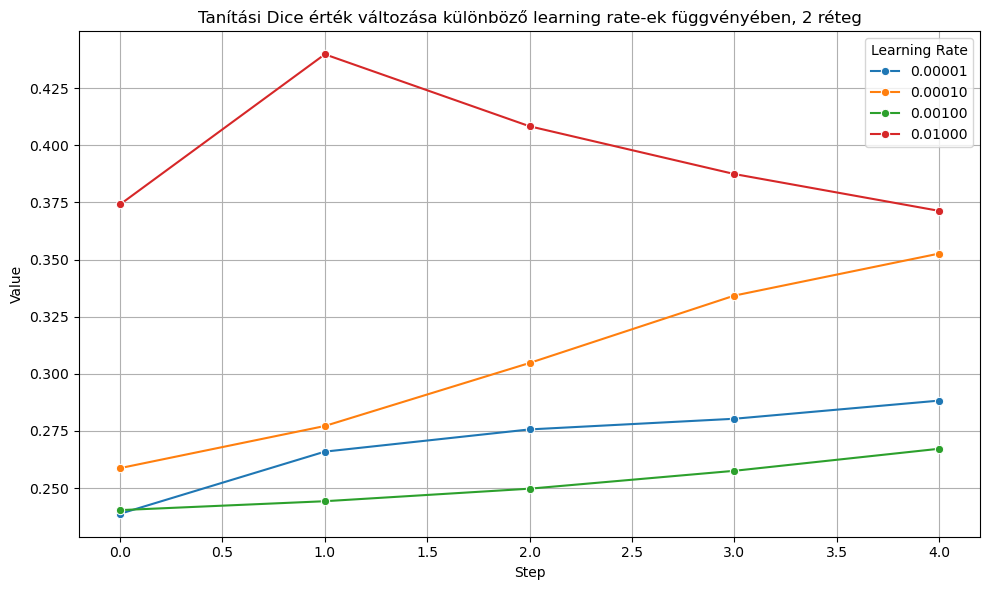

In [181]:
ot_epoch=egy_reteg[ket_reteg['epoch']==5]
ot_epoch=ot_epoch[ot_epoch['tag']=='Accuracy/train']
ot_epoch=ot_epoch[['step','value','learning_rate','cross_val']]
grouped = (
    ot_epoch.groupby(['step', 'learning_rate'])['value']
      .mean()
      .reset_index()
)
grouped['learning_rate'] = grouped['learning_rate'].map(lambda x: f"{x:.5f}")
grouped['learning_rate'] = grouped['learning_rate'].astype(str)
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='step', y='value', hue='learning_rate', marker='o',errorbar=None)

plt.title("Tanítási Dice érték változása különböző learning rate-ek függvényében, 2 réteg")
plt.xlabel("Step")
plt.ylabel("Value")
plt.legend(title="Learning Rate")
plt.grid(True)
plt.tight_layout()
plt.savefig('training_2_reteg_5_epoch.png', bbox_inches='tight')
plt.show()

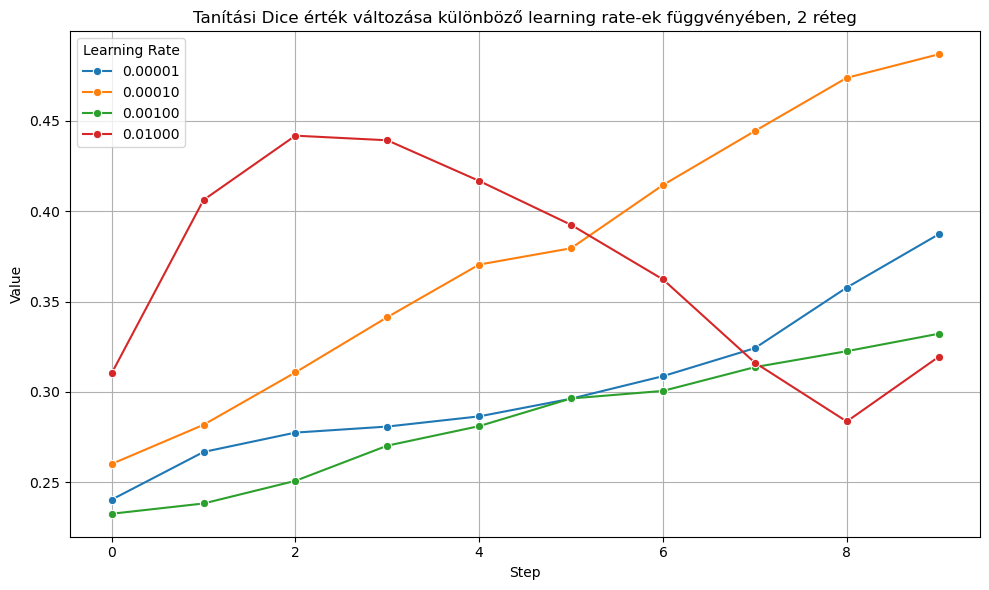

In [182]:
ot_epoch=egy_reteg[ket_reteg['epoch']==10]
ot_epoch=ot_epoch[ot_epoch['tag']=='Accuracy/train']
ot_epoch=ot_epoch[['step','value','learning_rate','cross_val']]
grouped = (
    ot_epoch.groupby(['step', 'learning_rate'])['value']
      .mean()
      .reset_index()
)
grouped['learning_rate'] = grouped['learning_rate'].map(lambda x: f"{x:.5f}")
grouped['learning_rate'] = grouped['learning_rate'].astype(str)
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='step', y='value', hue='learning_rate', marker='o',errorbar=None)

plt.title("Tanítási Dice érték változása különböző learning rate-ek függvényében, 2 réteg")
plt.xlabel("Step")
plt.ylabel("Value")
plt.legend(title="Learning Rate")
plt.grid(True)
plt.tight_layout()
plt.savefig('training_2_reteg_10_epoch.png', bbox_inches='tight')
plt.show()

In [44]:
import pandas as pd
egy_reteg=pd.read_excel('inference_1_reteg.xlsx')
horizontal=pd.read_excel('inference_horizontal.xlsx')
gaussian=pd.read_excel('inference_gaussian.xlsx')
epoch_100=pd.read_excel('100_epoch.xlsx')
lr_csokkentett=pd.read_excel('inference_lr_csokkentett_10_epoch.xlsx')

In [45]:
egy_reteg_alap=egy_reteg[(egy_reteg['learning_rate']==1e-5) & (egy_reteg['epoch']==10)]

In [46]:
atlagok = egy_reteg_alap[['Background','IRF', 'SRF', 'PED']].mean()
print(atlagok)

Background    0.938820
IRF           0.065947
SRF           0.114831
PED           0.120876
dtype: float64


In [35]:
atlagok = horizontal[['Background','IRF', 'SRF', 'PED']].mean()
print(atlagok)

Background    0.858080
IRF           0.038956
SRF           0.092053
PED           0.067114
dtype: float64


In [36]:
atlagok = gaussian[['Background','IRF', 'SRF', 'PED']].mean()
print(atlagok)

Background    0.874124
IRF           0.044066
SRF           0.084603
PED           0.059511
dtype: float64


In [38]:
atlagok = epoch_100[['Background','IRF', 'SRF', 'PED']].mean()
print(atlagok)

Background    0.970087
IRF           0.134700
SRF           0.106887
PED           0.157593
dtype: float64


In [43]:
atlagok = lr_csokkentett[['Background','IRF', 'SRF', 'PED']].mean()
print(atlagok)

Background    0.000000
IRF           0.007889
SRF           0.000000
PED           0.000000
dtype: float64


In [93]:
final_df=pd.read_excel('epoch_100_training.xlsx')
training_data=final_df[final_df['tag']=='Accuracy/train'][['step','value','cross_val']]

In [94]:
training_data['step'] = training_data['step'] + 1


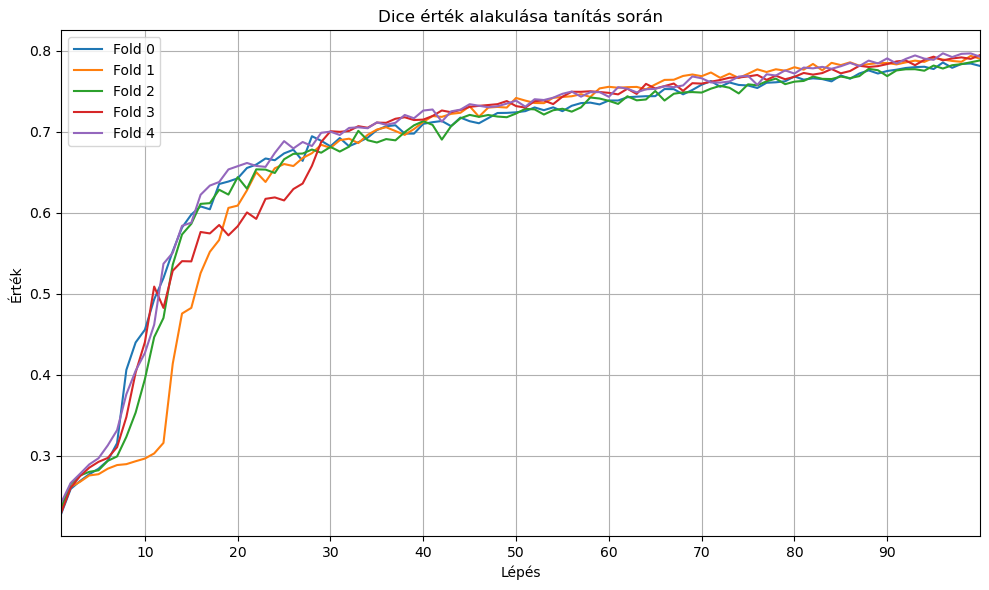

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Feltételezzük, hogy df már létezik a megfelelő oszlopokkal:
# 'step', 'value', 'model_id'

plt.figure(figsize=(10, 6))

# Végigmegyünk minden egyedi modellen és külön vonalat rajzolunk
for model in training_data['cross_val'].unique():
    subset = training_data[training_data['cross_val'] == model]
    plt.plot(subset['step'], subset['value'], label=f'Fold {model}')

plt.xlabel('Lépés')
plt.ylabel('Érték')
plt.title('Dice érték alakulása tanítás során')
plt.xticks(ticks=range(0, 100,10))
plt.xlim(1, 100)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('epoch_100_tanitas.png', bbox_inches='tight')
plt.show()

In [85]:
epoch_100 = pd.read_excel('inference_100_epoch.xlsx')

In [88]:
epoch_100[['Background','IRF','SRF','PED']].mean()

Background    0.973443
IRF           0.108814
SRF           0.114877
PED           0.182417
dtype: float64

In [103]:
import pandas as pd
df = pd.read_excel('inference_aroi.xlsx')

In [102]:
df[['Background','IRF','SRF','PED']].mean()

Background    0.969108
IRF           0.028450
SRF           0.088063
PED           0.385646
dtype: float64

In [105]:
df[['Background','IRF','SRF','PED']].mean()

Background    0.967682
IRF           0.031283
SRF           0.083790
PED           0.372330
dtype: float64